In [1]:
import nltk

sentence = "John Smith is from the United States and works at Microsoft."
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
tree = nltk.ne_chunk(tagged)

for subtree in tree:
    if hasattr(subtree, 'label') and subtree.label() == 'PERSON':
        for leaf in subtree.leaves():
            print(leaf[0])
    else:
        print(subtree[0])

John
Smith
is
from
the
('United', 'NNP')
and
works
at
('Microsoft', 'NNP')
.


In [3]:
print(tree)

(S
  (PERSON John/NNP)
  (PERSON Smith/NNP)
  is/VBZ
  from/IN
  the/DT
  (GPE United/NNP States/NNPS)
  and/CC
  works/VBZ
  at/IN
  (ORGANIZATION Microsoft/NNP)
  ./.)


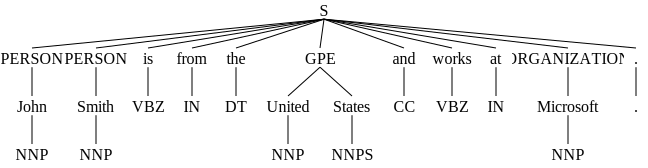

In [2]:
tree

In [11]:
import nltk

my_tokens = []

def traverse_tree(tree):
    global tokens
    if isinstance(tree, nltk.Tree):
        if tree.label() == 'PERSON':
            my_tokens.append("PERSON")
            print('PERSON:', ' '.join([child[0] for child in tree]))
        else:
            for child in tree:
                traverse_tree(child)
    else:
        my_tokens.append(tree[0])
        print('NOT PERSON:', tree[0])

sentence = "John Smith is from the United States and works at Microsoft."
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
tree = nltk.ne_chunk(tagged)

traverse_tree(tree)

print(my_tokens)

PERSON: John
PERSON: Smith
NOT PERSON: is
NOT PERSON: from
NOT PERSON: the
NOT PERSON: United
NOT PERSON: States
NOT PERSON: and
NOT PERSON: works
NOT PERSON: at
NOT PERSON: Microsoft
NOT PERSON: .
['PERSON', 'PERSON', 'is', 'from', 'the', 'United', 'States', 'and', 'works', 'at', 'Microsoft', '.']


In [12]:
import nltk
from nltk.tokenize import word_tokenize, TreebankWordDetokenizer
from nltk.tag import pos_tag
from nltk.tokenize.treebank import TreebankWordTokenizer, TreebankWordDetokenizer


In [14]:
t = TreebankWordTokenizer()
d = TreebankWordDetokenizer()
#toks = t.tokenize(text)
d.detokenize(my_tokens)

'PERSON PERSON is from the United States and works at Microsoft.'